**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [ ]:
!pip3 install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/twitter_training.csv', usecols=[3, 2], dtype={3: str, 2: str})

print(f'The data has total {data.shape[0]} samples.')

The data has total 74681 samples.


In [ ]:
data = data.sample(n=2059)

# Extract the features and labels
features = data.iloc[:, 0].values
labels = data.iloc[:, 1].astype(str).values

# Define a function to calculate sentiment scores
def sentiment_scores(sentence):
   sid_obj = SentimentIntensityAnalyzer()
   sentiment_dict = sid_obj.polarity_scores(sentence)
   return sentiment_dict

# Apply the sentiment_scores function to each element in features
sentiment_scores_list = [sentiment_scores(feature) for feature in features]

# Convert the list of dictionaries to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores_list)

In [ ]:
# Decide the sentiment of each sentence
sentiment_labels = []
for score in sentiment_scores_df['compound']:
   if score >= 0.05:
       sentiment_labels.append('Positive')
   elif score <= -0.05:
       sentiment_labels.append('Negative')
   else:
       sentiment_labels.append('Neutral')

# Add a column for the sentiment label
sentiment_scores_df['sentiment'] = sentiment_labels

results = sentiment_scores_df

# Print the DataFrame
print(results)

      neg  neu  pos  compound sentiment
0     1.0  0.0  0.0   -0.5719  Negative
1     0.0  0.0  1.0    0.5574  Positive
2     1.0  0.0  0.0   -0.5719  Negative
3     0.0  1.0  0.0    0.0000   Neutral
4     1.0  0.0  0.0   -0.5719  Negative
...   ...  ...  ...       ...       ...
2054  0.0  1.0  0.0    0.0000   Neutral
2055  0.0  1.0  0.0    0.0000   Neutral
2056  1.0  0.0  0.0   -0.5719  Negative
2057  0.0  1.0  0.0    0.0000   Neutral
2058  1.0  0.0  0.0   -0.5719  Negative

[2059 rows x 5 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count the number of each sentiment label
sentiment_counts = results['sentiment'].value_counts()

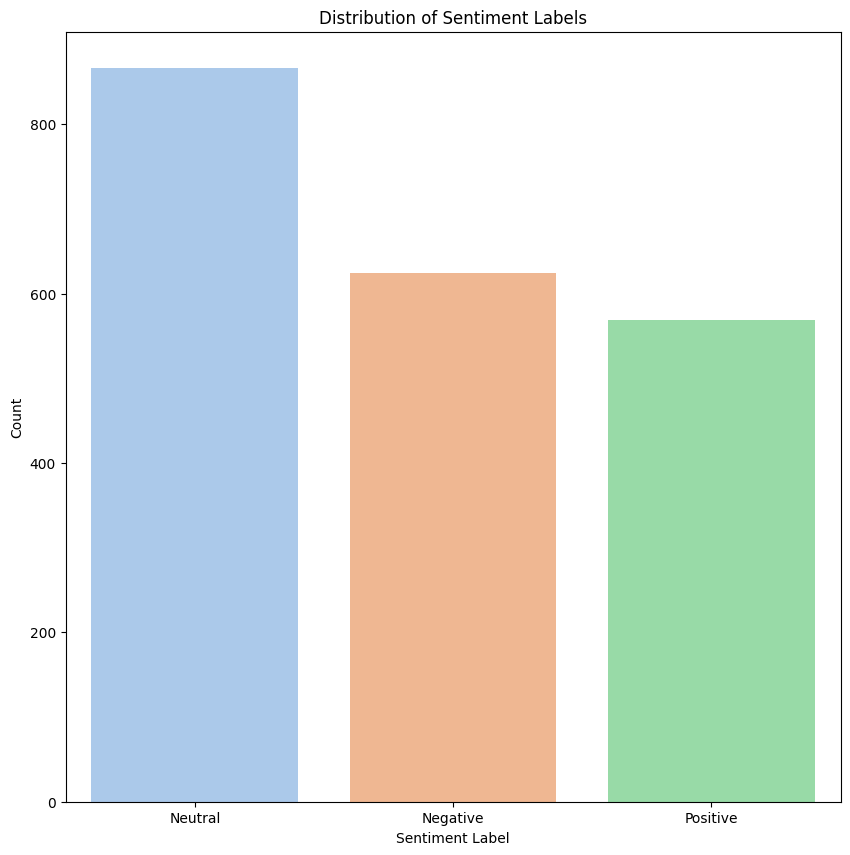

In [ ]:
# Creating a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

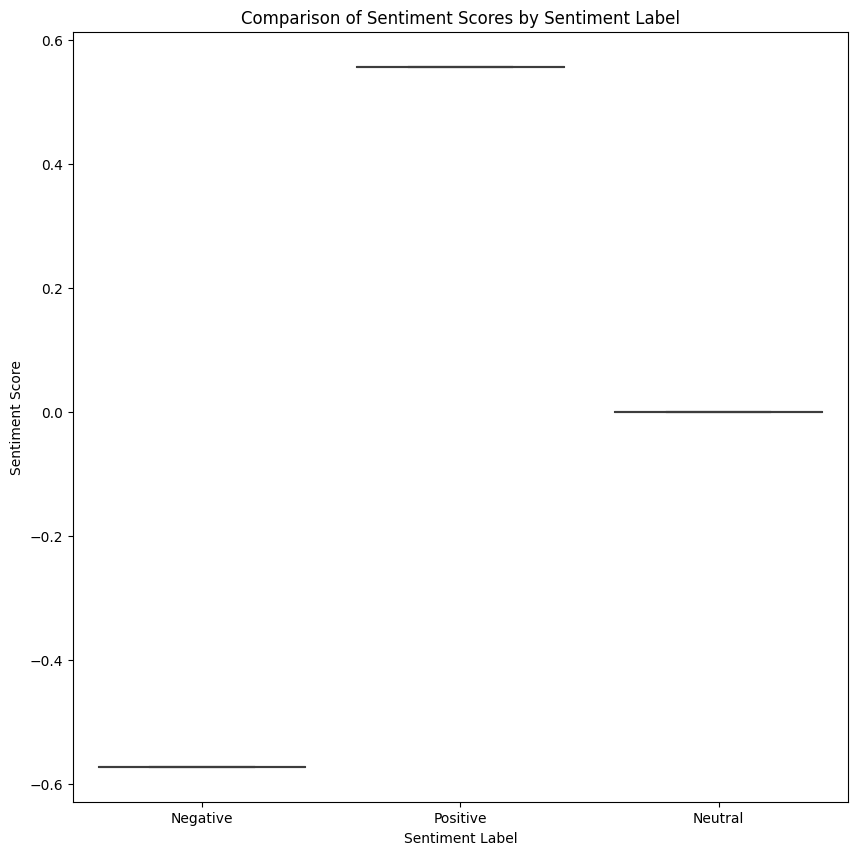

In [ ]:
# Creating a box plot
plt.figure(figsize=(10, 10))
sns.boxplot(x='sentiment', y='compound', data=results)
plt.title('Comparison of Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

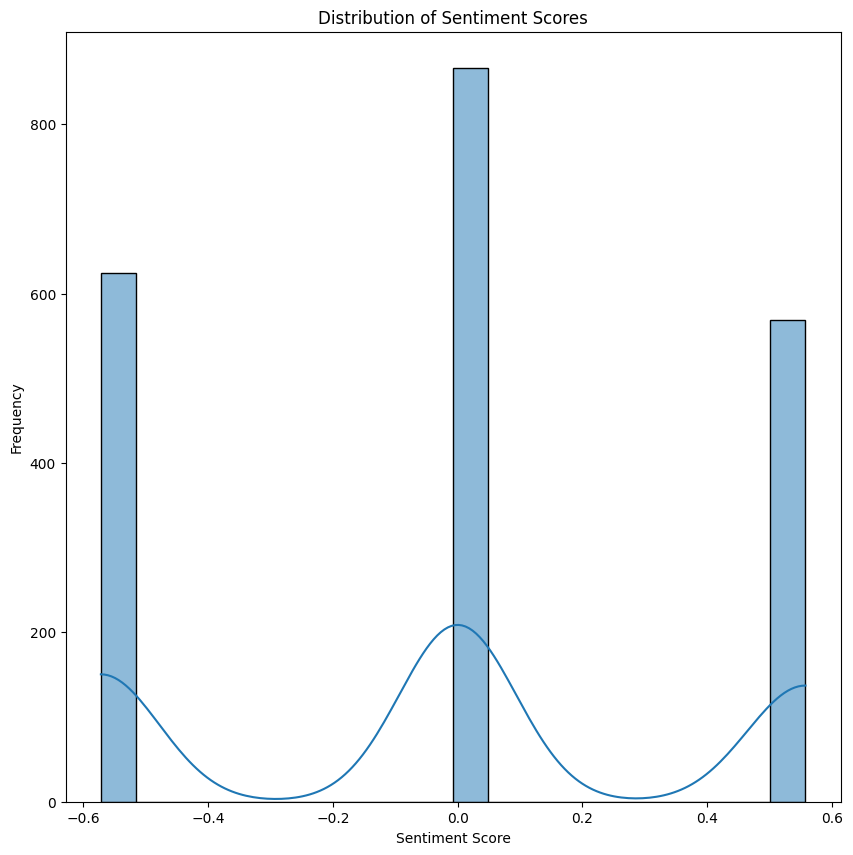

In [ ]:
# Creating a histogram
plt.figure(figsize=(10, 10))
sns.histplot(data=results, x='compound', bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

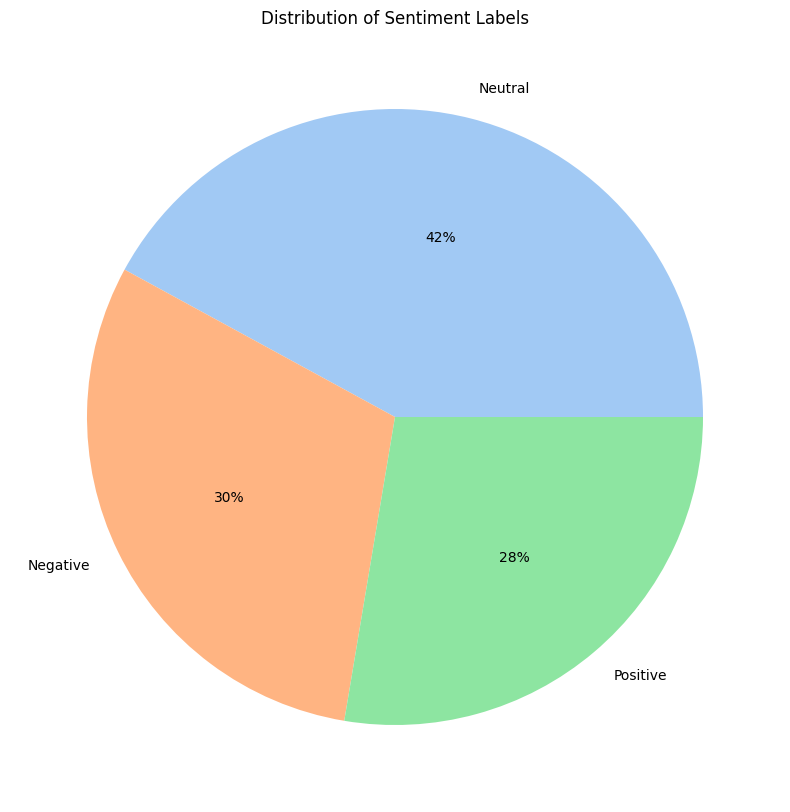

In [ ]:
# Creating a piechart
data = sentiment_counts.values
labels = sentiment_counts.index
colors = sns.color_palette('pastel')[0:len(labels)]
plt.figure(figsize=(10, 10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Sentiment Labels')
plt.show()